In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [25]:
df= pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [26]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40281,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12197,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18029,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14381,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
import matplotlib.pyplot as plt

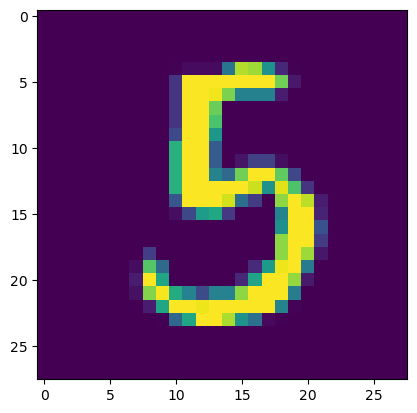

In [28]:
plt.imshow(df.iloc[10348,1:].values.reshape(28,28))

In [29]:
#Start with simple ML model 

# **Start with simple ML model **

In [30]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
X_train.shape

(33600, 784)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn=KNeighborsClassifier()

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred=knn.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

# Now We will see with the PCA analysis 

## PCA start with Standarization 

In [38]:
from sklearn.preprocessing import StandardScaler 
scaler= StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [51]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=200)

In [52]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [53]:
X_train_trf.shape

(33600, 200)

In [54]:
knn=KNeighborsClassifier()

In [55]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [56]:
y_pred=knn.predict(X_test_trf)

In [57]:
accuracy_score(y_test,y_pred)

0.9677380952380953

In [58]:
for i in range(1,785):
    pca=PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred=knn.predict(X_test_trf)
    print(accuracy_score(y_test,y_pred))
    

0.27380952380952384
0.42238095238095236
0.4851190476190476
0.6194047619047619
0.7297619047619047
0.8188095238095238
0.866547619047619
0.8940476190476191
0.9076190476190477
0.9246428571428571
0.9316666666666666
0.9419047619047619
0.9494047619047619
0.9538095238095238
0.9544047619047619
0.9582142857142857
0.9619047619047619
0.9625
0.9646428571428571
0.9658333333333333
0.9665476190476191
0.9682142857142857
0.9692857142857143
0.9702380952380952
0.9705952380952381
0.9709523809523809
0.9708333333333333
0.9705952380952381
0.9713095238095238
0.9716666666666667
0.9725
0.9722619047619048
0.9707142857142858
0.9714285714285714
0.9711904761904762
0.9719047619047619
0.9722619047619048
0.9719047619047619
0.9729761904761904
0.9728571428571429
0.9722619047619048
0.9721428571428572
0.9727380952380953
0.9722619047619048
0.9720238095238095
0.9719047619047619
0.9728571428571429
0.9730952380952381
0.9729761904761904
0.9723809523809523
0.9732142857142857
0.9730952380952381
0.9727380952380953
0.97226190476190

KeyboardInterrupt: 

In [60]:
# transforming to 2D coordinate system
pca= PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [61]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter(x=X_train_trf[:,0],
              y=X_train_trf[:,1],
              color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [62]:
# transforming to 3D coordinate system
pca= PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [63]:
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(df,x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],color=y_train_trf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()

In [67]:
#Eigen Values
pca.explained_variance_

array([335506.57620536, 244807.10505047, 212051.03412513])

In [70]:
# Eigen Vectors here it is 3
pca.components_.shape

(3, 784)

In [71]:
# Now we can transform  this data using this pc

In [72]:
#percentage
pca.explained_variance_ratio_

array([0.09770722, 0.07129345, 0.06175413])

In [73]:
pca= PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [74]:
pca.explained_variance_.shape

(784,)

In [76]:
pca.components_.shape

(784, 784)

In [78]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09770722, 0.16900067, 0.2307548 , 0.28465032, 0.33357585,
       0.37694429, 0.40971003, 0.43863706, 0.46634409, 0.4896358 ,
       0.51056687, 0.53103851, 0.54811645, 0.56494851, 0.58079573,
       0.59567555, 0.60890653, 0.6217459 , 0.63357974, 0.6450916 ,
       0.65585129, 0.66609344, 0.6757597 , 0.68493267, 0.69377981,
       0.70211509, 0.7102658 , 0.71801912, 0.72543898, 0.73237223,
       0.73898072, 0.74531281, 0.75134494, 0.75723224, 0.76285054,
       0.76824915, 0.77332825, 0.77819952, 0.78291205, 0.78755761,
       0.79208251, 0.7965231 , 0.80068828, 0.80464464, 0.80848068,
       0.81221196, 0.815819  , 0.81930765, 0.82264965, 0.82582976,
       0.82897181, 0.83204415, 0.83496782, 0.83783336, 0.84062454,
       0.84331783, 0.84596712, 0.84853351, 0.85106204, 0.85351457,
       0.85592008, 0.85831105, 0.86057999, 0.86279635, 0.8649424 ,
       0.86700054, 0.86901774, 0.87098082, 0.87291702, 0.87479944,
       0.87665559, 0.87847316, 0.88022525, 0.88195105, 0.88360

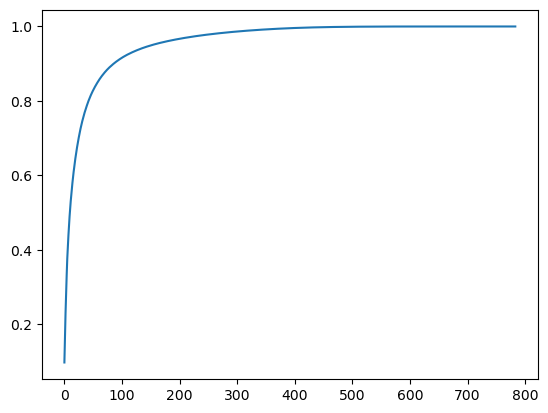

In [79]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))